# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)

#City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed

city_pull = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []
city_temp = ' '

count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try: 
        city_temp = city
        city_temp = city_temp.replace(' ', '%20')
        #print(city_temp)
        response = requests.get(query_url + city_temp).json() 
    
        city_pull.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        city_count = response["name"]
        print(f"Processing Record {count} | {city_count}")
    
        count = count + 1
    #!!!!!Remember to REMOVE    
#         if count > 15:
#             break
        #print(count)
     
        time.sleep(1.01)

    except:
        print("City not found. Skipping...")
    continue
   

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ushuaia
Processing Record 2 | Castro
Processing Record 3 | Uyovu
Processing Record 4 | Yeppoon
Processing Record 5 | Saskylakh
Processing Record 6 | Rikitea
Processing Record 7 | Nadym
Processing Record 8 | Chuy
Processing Record 9 | Kurumkan
Processing Record 10 | Jiayuguan
Processing Record 11 | Atuona
Processing Record 12 | Nalut
Processing Record 13 | Nanortalik
Processing Record 14 | Punta Arenas
Processing Record 15 | Codrington
Processing Record 16 | Hilo
Processing Record 17 | Dumas
City not found. Skipping...
Processing Record 18 | Ceyhan
Processing Record 19 | Mayumba
Processing Record 20 | Butaritari
Processing Record 21 | Iqaluit
Processing Record 22 | Ketchikan
Processing Record 23 | Saint George
Processing Record 24 | Marawi
Processing Record 25 | Ust-Ilimsk
Processing Record 26 | Torbay
Processing Record 27 | Mar del Plata
Processing Record 28 | Pevek
Processing Record 29 | Paamiut
Processing 

Processing Record 229 | Feicheng
Processing Record 230 | Santa Maria
Processing Record 231 | Noumea
Processing Record 232 | Namibe
Processing Record 233 | Pangnirtung
Processing Record 234 | Bilibino
Processing Record 235 | Talnakh
Processing Record 236 | Druzhba
Processing Record 237 | High Prairie
Processing Record 238 | Mayo
Processing Record 239 | San Cristobal
Processing Record 240 | Fairbanks
Processing Record 241 | Pangody
Processing Record 242 | Dunedin
Processing Record 243 | Naze
Processing Record 244 | Honiara
Processing Record 245 | Pitkyaranta
Processing Record 246 | Puerto Ayora
Processing Record 247 | Toma
Processing Record 248 | Makakilo City
City not found. Skipping...
Processing Record 249 | Nortelandia
Processing Record 250 | Hirado
Processing Record 251 | Gisborne
Processing Record 252 | Hamilton
Processing Record 253 | Port Alfred
Processing Record 254 | Soyo
Processing Record 255 | Teknaf
City not found. Skipping...
Processing Record 256 | Kamaishi
City not found.

City not found. Skipping...
Processing Record 452 | Ust-Kulom
Processing Record 453 | Dakar
Processing Record 454 | Porto Nacional
Processing Record 455 | Kirkuk
Processing Record 456 | Kumluca
Processing Record 457 | Tornio
Processing Record 458 | Waynesville
Processing Record 459 | Qujing
City not found. Skipping...
Processing Record 460 | Jonesboro
Processing Record 461 | Half Moon Bay
Processing Record 462 | Orvault
City not found. Skipping...
Processing Record 463 | Lufilufi
Processing Record 464 | Gloucester
Processing Record 465 | Yerbogachen
Processing Record 466 | Narsingi
Processing Record 467 | Guerrero Negro
Processing Record 468 | Spornoye
Processing Record 469 | Hanzhong
City not found. Skipping...
Processing Record 470 | Krasnyy Yar
Processing Record 471 | Ulladulla
Processing Record 472 | Jiuquan
Processing Record 473 | Tasiilaq
Processing Record 474 | Linxia
Processing Record 475 | Lubango
Processing Record 476 | Cedar City
Processing Record 477 | Neyshabur
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_pull,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": temp,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [7]:
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,99,AR,1563093115,98,-54.81,-68.31,33.89,3.24
1,Castro,20,CL,1563093116,81,-42.48,-73.76,44.60,10.29
2,Uyovu,3,TZ,1563093118,37,-3.28,31.53,83.03,6.89
3,Yeppoon,100,AU,1563093119,25,-23.13,150.74,62.60,9.17
4,Saskylakh,0,RU,1563093120,46,71.97,114.09,55.85,15.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

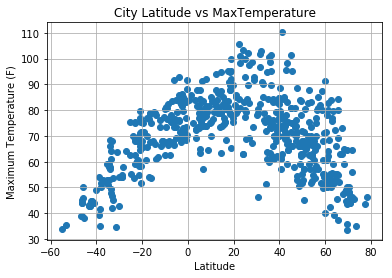

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o")

plt.title(f"City Latitude vs MaxTemperature")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatitudevsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

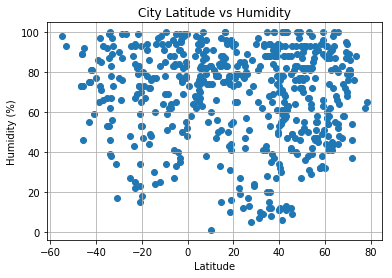

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o")

plt.title(f"City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatitudevsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

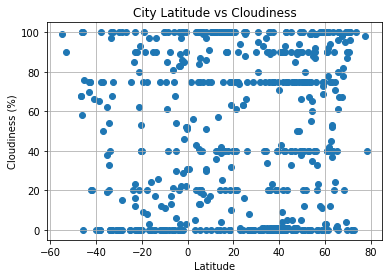

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o")

plt.title(f"City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatitudevsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

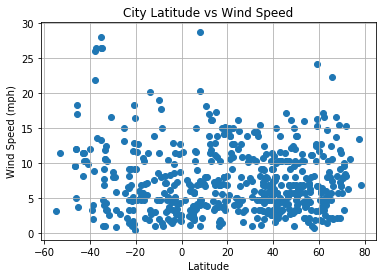

In [11]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o")

plt.title(f"City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatitudevsCloudiness.png")
plt.show()